<h1> Outline </h1>

- Load the Dataset <br />
- Preprocess and Explore the data <br/>
- Create the Generator model <br/>
- Data Preprocessing for Neural Networks <br/>
- Create the Discriminator model <br/>
- Combine Generator and Discriminator models to Build The GAN <br/>
- Train and evaluate our GAN <br/>
- Generate synthetic data using the trained Generator <br/>
- PCA for Data visualizatio <br/>

<h1>Importing the Modules </h1>

In [42]:
import numpy as np
import pandas as pd

# Importing neural network modules
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal


from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import plot_model

# Importing some machine learning modules
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Import data visualization modules
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

print("Modules are imported!")

Modules are imported!


<h1>Importing the data </h1>

In [3]:
data = pd.read_csv('/content/Creditcard_dataset.csv')
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
1     7 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
2    10  1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152 -1.423236   
3    10  0.384978  0.616109 -0.874300 -0.094019  2.924584  3.317027  0.470455   
4    11  1.069374  0.287722  0.828613  2.712520 -0.178398  0.337544 -0.096717   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
1 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709 -0.415267   
2  0.048456 -1.720408  ... -0.009302  0.313894  0.027740  0.500512  0.251367   
3  0.538247 -0.558895  ...  0.049924  0.238422  0.009130  0.996710 -0.767315   
4  0.115982 -0.221083  ... -0.036876  0.074412 -0.071407  0.104744  0.548265   

        V26       V27       V28  Amount  Class  
0 -0.221929  0.062723  0.061458  123.50      0  
1 -0.051634 -1.206921 -1.085339   40.80      0  
2 -0.129478  0.042850  0.016253    7.80      0  
3 -0.492208  0.042472 -0.054337    9.99      0  
4  0.104094  0.021491  0.021293   27.50      0  

[5 rows x 31 columns]

Check the data shape

In [4]:
data.shape

(50492, 31)

Let's see how many genuine and limited fraudulent records we have

In [5]:
data.Class.value_counts()

0    50000
1      492
Name: Class, dtype: int64

## Data Preprocessing and Exploration: 

*   Removing all the rows with `Nan` values
*   Removing `Time` column
*   Feature Scaling `Amount` column
*   Split the data into features and labels
*   Data Exploration


Removing the rows `Nan` values in the dataset

In [6]:
data.dropna(inplace = True)
data.shape

(50492, 31)

Removing Time column

In [7]:
data = data.drop(axis = 1, columns = 'Time')
data.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
1 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
2  1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152 -1.423236   
3  0.384978  0.616109 -0.874300 -0.094019  2.924584  3.317027  0.470455   
4  1.069374  0.287722  0.828613  2.712520 -0.178398  0.337544 -0.096717   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
1 -3.807864  0.615375  1.249376  ...  1.943465 -1.015455  0.057504 -0.649709   
2  0.048456 -1.720408  1.626659  ... -0.009302  0.313894  0.027740  0.500512   
3  0.538247 -0.558895  0.309755  ...  0.049924  0.238422  0.009130  0.996710   
4  0.115982 -0.221083  0.460230  ... -0.036876  0.074412 -0.071407  0.104744   

        V25       V26       V27       V28  Amount  Class  
0  0.647376 -0.221929  0.062723  0.061458  123.50      0  
1 -0.415267 -0.051634 -1.206921 -1.085339   40.80      0  
2  0.251367 -0.129478  0.042850  0.016253    7.80      0  
3 -0.767315 -0.492208  0.042472 -0.054337    9.99      0  
4  0.548265  0.104094  0.021491  0.021293   27.50      0  

[5 rows x 30 columns]

Feature Scaling of Amount column

In [8]:
scaler = StandardScaler()
scaler.fit_transform(data[['Amount']])
data.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
1 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
2  1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152 -1.423236   
3  0.384978  0.616109 -0.874300 -0.094019  2.924584  3.317027  0.470455   
4  1.069374  0.287722  0.828613  2.712520 -0.178398  0.337544 -0.096717   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
1 -3.807864  0.615375  1.249376  ...  1.943465 -1.015455  0.057504 -0.649709   
2  0.048456 -1.720408  1.626659  ... -0.009302  0.313894  0.027740  0.500512   
3  0.538247 -0.558895  0.309755  ...  0.049924  0.238422  0.009130  0.996710   
4  0.115982 -0.221083  0.460230  ... -0.036876  0.074412 -0.071407  0.104744   

        V25       V26       V27       V28  Amount  Class  
0  0.647376 -0.221929  0.062723  0.061458  123.50      0  
1 -0.415267 -0.051634 -1.206921 -1.085339   40.80      0  
2  0.251367 -0.129478  0.042850  0.016253    7.80      0  
3 -0.767315 -0.492208  0.042472 -0.054337    9.99      0  
4  0.548265  0.104094  0.021491  0.021293   27.50      0  

[5 rows x 30 columns]

Let's split the genuine and fraud records into separate dataframes

In [9]:
data_fraud = data[data.Class == 1]
data_genuine = data[data.Class == 0]
data.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
1 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
2  1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152 -1.423236   
3  0.384978  0.616109 -0.874300 -0.094019  2.924584  3.317027  0.470455   
4  1.069374  0.287722  0.828613  2.712520 -0.178398  0.337544 -0.096717   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
1 -3.807864  0.615375  1.249376  ...  1.943465 -1.015455  0.057504 -0.649709   
2  0.048456 -1.720408  1.626659  ... -0.009302  0.313894  0.027740  0.500512   
3  0.538247 -0.558895  0.309755  ...  0.049924  0.238422  0.009130  0.996710   
4  0.115982 -0.221083  0.460230  ... -0.036876  0.074412 -0.071407  0.104744   

        V25       V26       V27       V28  Amount  Class  
0  0.647376 -0.221929  0.062723  0.061458  123.50      0  
1 -0.415267 -0.051634 -1.206921 -1.085339   40.80      0  
2  0.251367 -0.129478  0.042850  0.016253    7.80      0  
3 -0.767315 -0.492208  0.042472 -0.054337    9.99      0  
4  0.548265  0.104094  0.021491  0.021293   27.50      0  

[5 rows x 30 columns]

Split the data into features and labels

In [10]:
X = data.drop('Class', axis = 1)
y = data.Class

## Data Exploration:
- Apply PCA to reduce the dimensionality of features `X` into two dimensions
- Use a scatter plot to visualize our data

In [12]:
pca = PCA(2)
transformed_data = pca.fit_transform(X)
df = pd.DataFrame(transformed_data)
df['label'] = y
df

0          1  label
0       35.473928  -0.489625      0
1      -47.230299  -0.531495      0
2      -80.226598  -0.896651      0
3      -78.040063  -0.561044      0
4      -60.529196  -0.478675      0
...           ...        ...    ...
50487  301.976891  10.704009      1
50488  -87.270259   7.067482      1
50489  -10.138078   7.097612      1
50490  156.978014  11.569780      1
50491  -45.499684  -0.169376      1

[50492 rows x 3 columns]

Let's Use a scatter plot to visualize our data

In [13]:
px.scatter(df, x = 0 , y= 1, color = df.label.astype(str))

## Building the Generator Model

Write a method to create the Generator model architecture

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_142 (Dense)           (None, 32)                960       
                                                                 
 batch_normalization_48 (Ba  (None, 32)                128       
 tchNormalization)                                               
                                                                 
 dense_143 (Dense)           (None, 64)                2112      
                                                                 
 batch_normalization_49 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dense_144 (Dense)           (None, 128)               8320      
                                                                 
 batch_normalization_50 (Ba  (None, 128)             

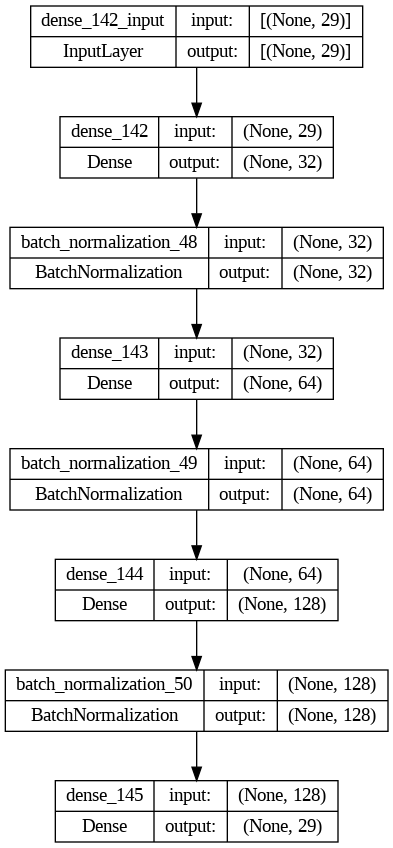

In [66]:
def build_generator():
  model = Sequential()

  model.add(Dense(32, activation = 'relu', input_dim = 29, kernel_initializer = 'he_uniform'))
  model.add(BatchNormalization())

  model.add(Dense(64, activation = 'relu'))
  model.add(BatchNormalization())

  model.add(Dense(128, activation = 'relu'))
  model.add(BatchNormalization())

  model.add(Dense(29, activation = 'linear'))
  # model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  model.summary()

  return model


gen = build_generator()
plot_model(gen, to_file = 'generator_model_plot.png',
           show_shapes = True,
           show_layer_names = True,
           expand_nested = True,
           dpi = 96,
           rankdir = 'TB'
           )




## Building the Discriminator Model

Create the Discriminator model architecture:

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_146 (Dense)           (None, 128)               3840      
                                                                 
 dense_147 (Dense)           (None, 64)                8256      
                                                                 
 dense_148 (Dense)           (None, 32)                2080      
                                                                 
 dense_149 (Dense)           (None, 32)                1056      
                                                                 
 dense_150 (Dense)           (None, 16)                528       
                                                                 
 dense_151 (Dense)           (None, 1)                 17        
                                                                 
Total params: 15777 (61.63 KB)
Trainable params: 1577

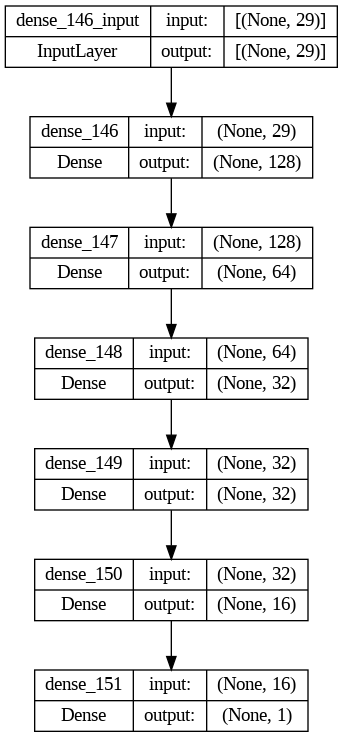

In [67]:
def build_discriminator():
  model = Sequential()

  model.add(Dense(128, input_dim =29, activation = 'relu', kernel_initializer = 'he_uniform'))

  model.add(Dense(64, activation = 'relu'))

  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(16, activation = 'relu'))

  model.add(Dense(1, activation = 'sigmoid'))

  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  model.summary()

  return model


# visualize Model architecture
disc = build_discriminator()
plot_model(disc, to_file = 'discriminator_model_plot.png',
           show_shapes = True,
           show_layer_names = True,
           expand_nested = True,
           dpi = 96,
           rankdir = 'TB'
           )

## Combine Generator and Discriminator models to Build The GAN

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 29)]              0         
                                                                 
 sequential_12 (Sequential)  (None, 29)                16029     
                                                                 
 sequential_13 (Sequential)  (None, 1)                 15777     
                                                                 
Total params: 31806 (124.24 KB)
Trainable params: 15581 (60.86 KB)
Non-trainable params: 16225 (63.38 KB)
_________________________________________________________________


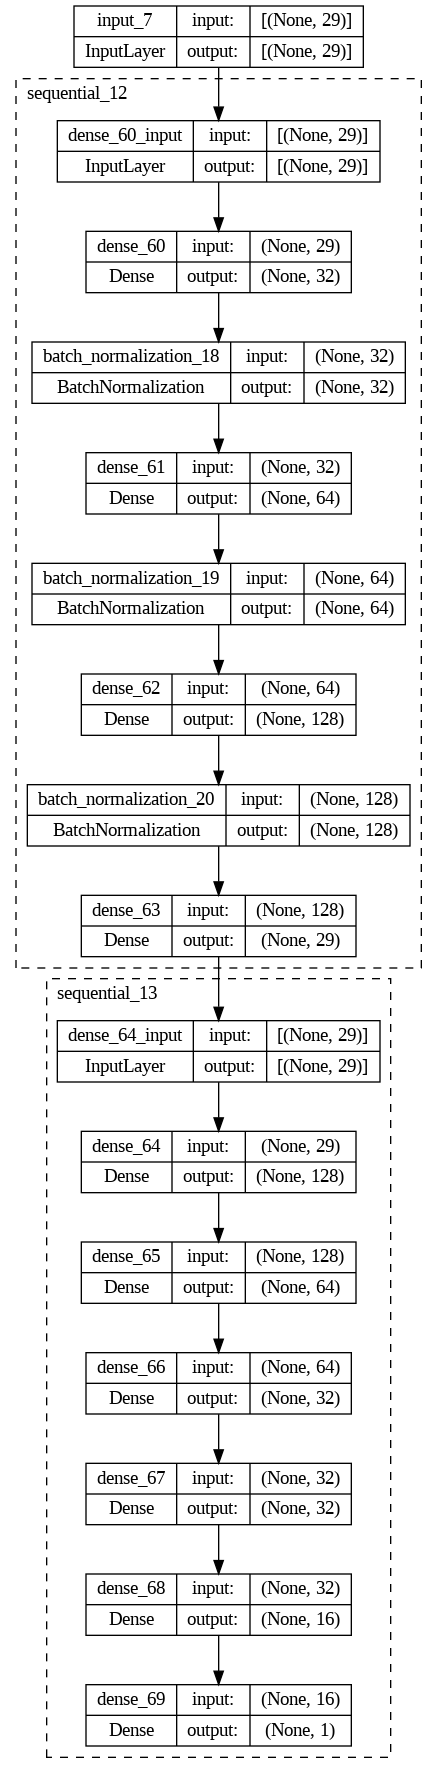

In [65]:
def build_gan(generator, discriminator):
  discriminator.trainable = False # Freeze the discriminator

  gan_input = Input(shape = (generator.input_shape[1],))
  x = generator(gan_input)

  gan_output = discriminator(x)
  gan = Model(gan_input, gan_output)
  gan.summary()

  return gan

gans = build_gan(generator, discriminator)
plot_model(gans, to_file = 'gans_model_plot.png',
           show_shapes = True,
           show_layer_names = True,
           expand_nested = True,
           dpi = 96,
           rankdir = 'TB'
           )

Let's create a method that generates synthetic data using the Generator

In [35]:
def generate_synthetic_data(generator, num_samples):
  noise = np.random.normal(0, 1, (num_samples,generator.input_shape[1] ))
  fake_data = generator.predict(noise)

  return fake_data

## Train and evaluate our GAN
*    Defining some variables
*    Creating our GAN
*    Training the GAN
*    Monitor the GAN performance using PCA




In [36]:
def monitor_generator(generator):
    # Initialize a PCA (Principal Component Analysis) object with 2 components
    pca = PCA(n_components=2)

    # Drop the 'Class' column from the fraud dataset to get real data
    real_fraud_data = data_fraud.drop("Class", axis=1)

    # Transform the real fraud data using PCA
    transformed_data_real = pca.fit_transform(real_fraud_data.values)

    # Create a DataFrame for the transformed real data and add a 'label' column with the value 'real'
    df_real = pd.DataFrame(transformed_data_real)
    df_real['label'] = "real"

    # Generate synthetic fraud data using the provided generator and specify the number of samples (492 in this case)
    synthetic_fraud_data = generate_synthetic_data(generator, 492)

    # Transform the synthetic fraud data using PCA
    transformed_data_fake = pca.fit_transform(synthetic_fraud_data)

    # Create a DataFrame for the transformed fake data and add a 'label' column with the value 'fake'
    df_fake = pd.DataFrame(transformed_data_fake)
    df_fake['label'] = "fake"

    # Concatenate the real and fake data DataFrames
    df_combined = pd.concat([df_real, df_fake])

    # Create a scatterplot to visualize the data points, using the first and second PCA components as x and y, respectively,
    # and color points based on the 'label' column, with a size of 10
    plt.figure()
    sns.scatterplot(data=df_combined, x=0, y=1, hue='label', s=10)
    plt.show()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 32)                960       
                                                                 
 batch_normalization_18 (Ba  (None, 32)                128       
 tchNormalization)                                               
                                                                 
 dense_61 (Dense)            (None, 64)                2112      
                                                                 
 batch_normalization_19 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dense_62 (Dense)            (None, 128)               8320      
                                                                 
 batch_normalization_20 (Ba  (None, 128)             

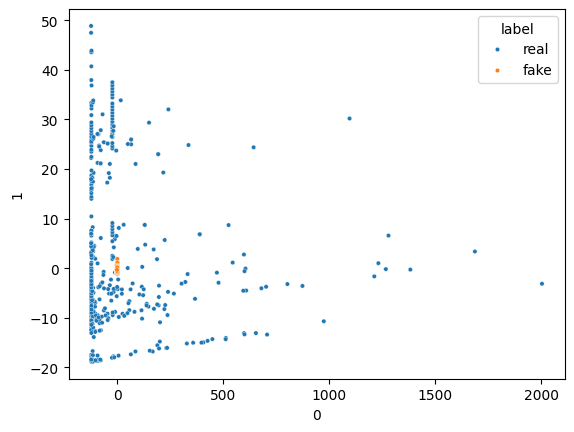

16/16 [==============================] - 0s 3ms/step


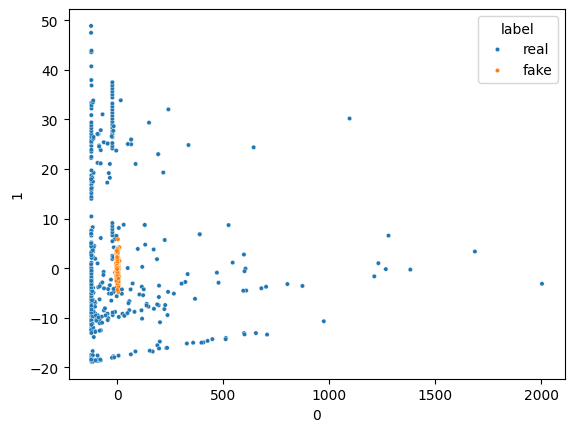

16/16 [==============================] - 0s 2ms/step


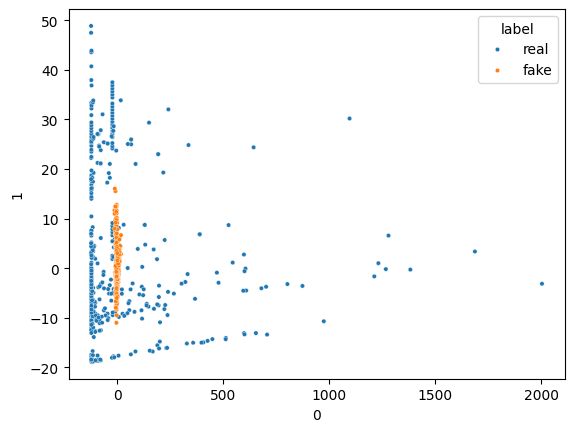

16/16 [==============================] - 0s 2ms/step


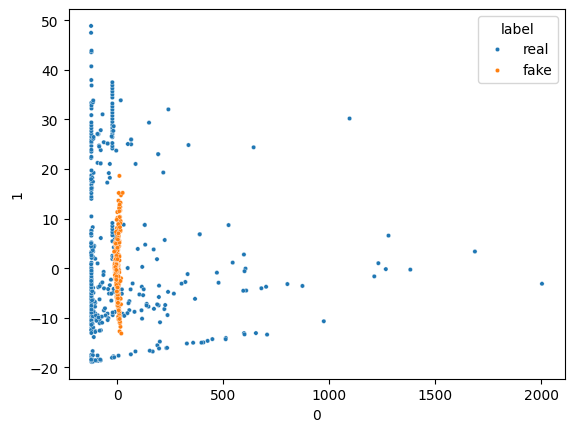

16/16 [==============================] - 0s 3ms/step


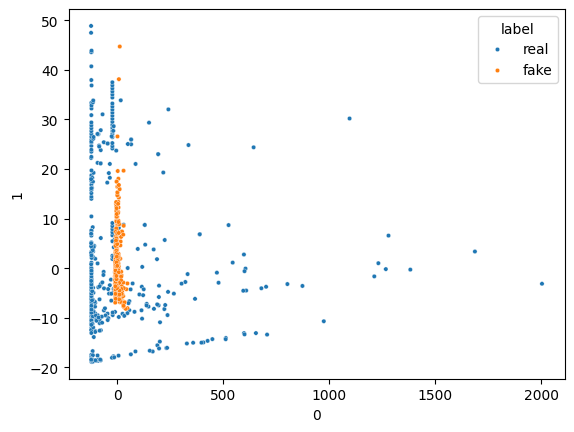

16/16 [==============================] - 0s 2ms/step


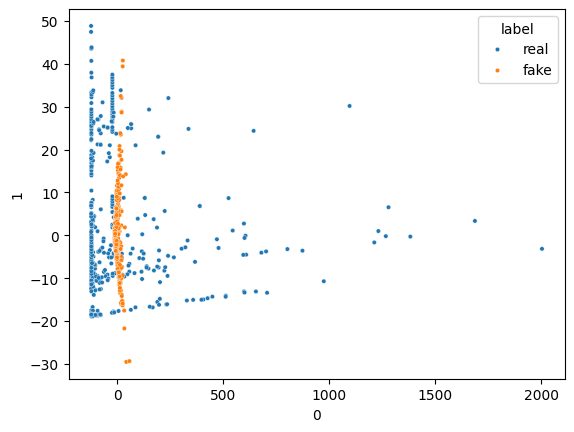

16/16 [==============================] - 0s 2ms/step


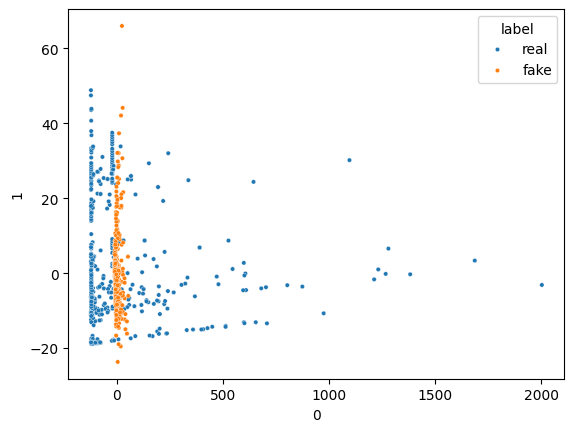

16/16 [==============================] - 0s 2ms/step


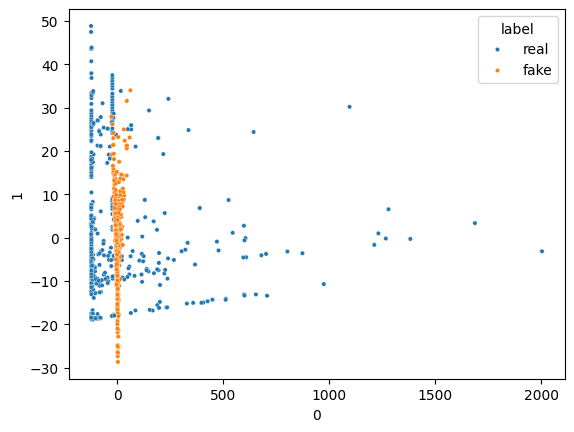

16/16 [==============================] - 0s 3ms/step


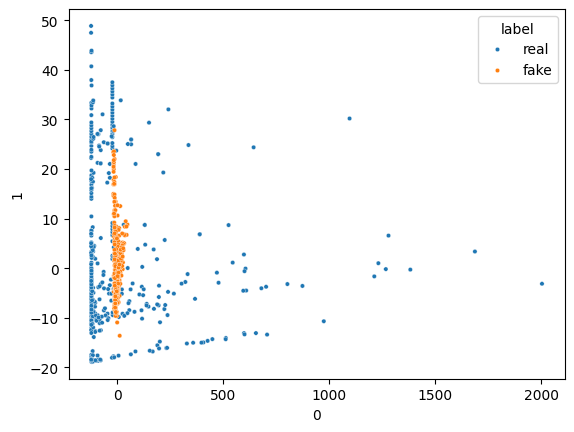

16/16 [==============================] - 0s 3ms/step


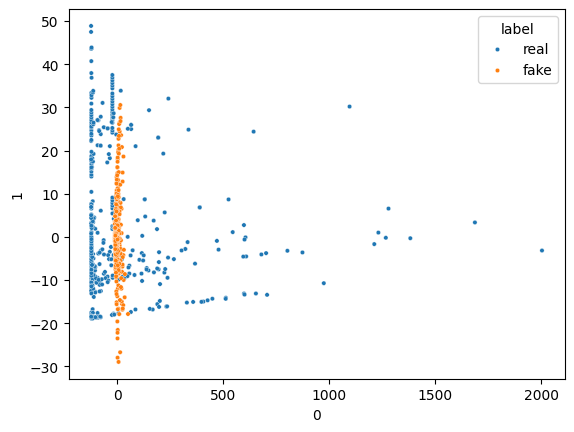

16/16 [==============================] - 0s 3ms/step


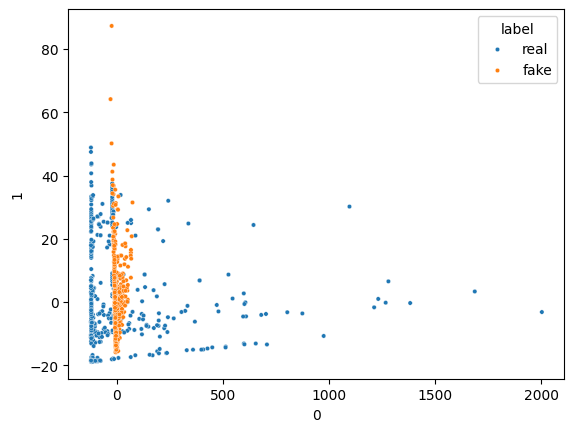

16/16 [==============================] - 0s 2ms/step


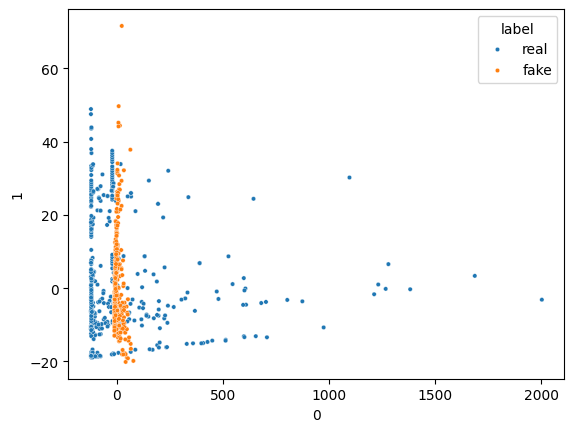

16/16 [==============================] - 0s 3ms/step


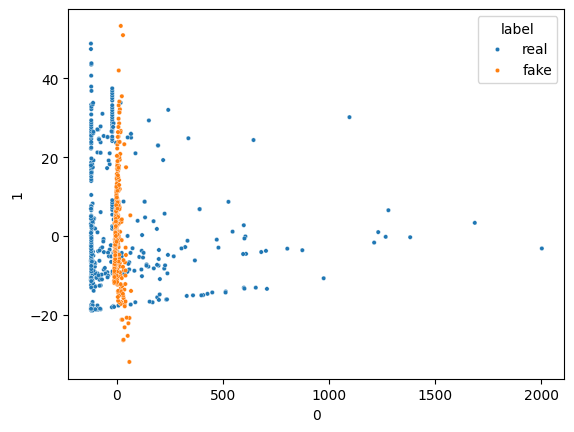

16/16 [==============================] - 0s 3ms/step


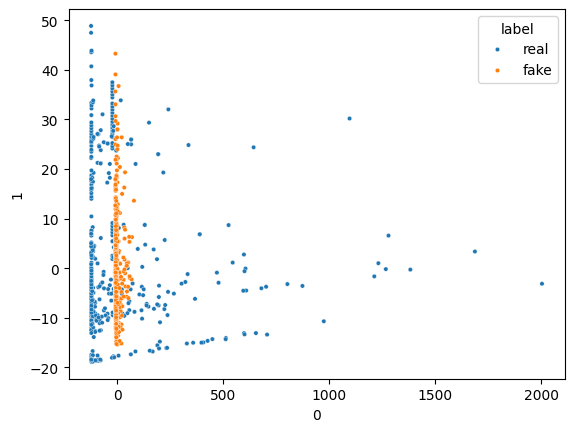

16/16 [==============================] - 0s 2ms/step


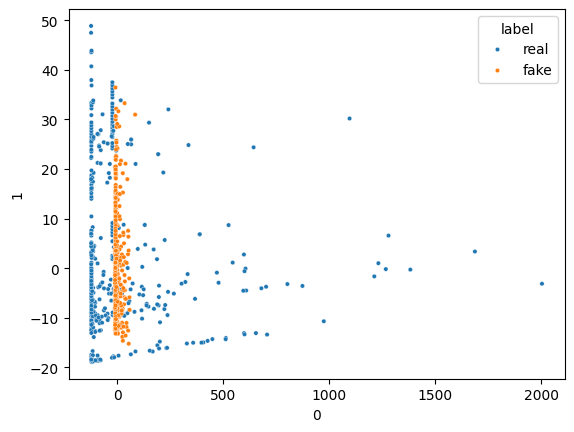

16/16 [==============================] - 0s 2ms/step


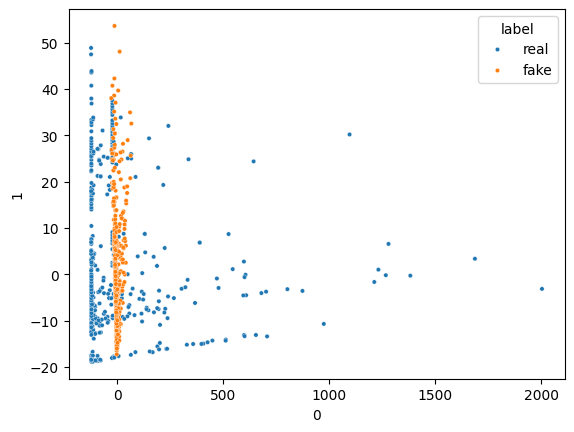

16/16 [==============================] - 0s 4ms/step


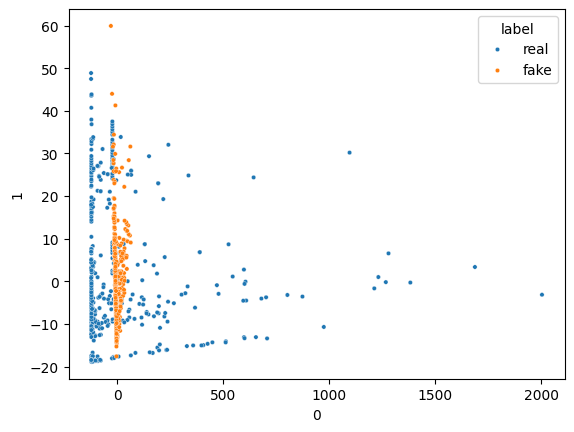

16/16 [==============================] - 0s 2ms/step


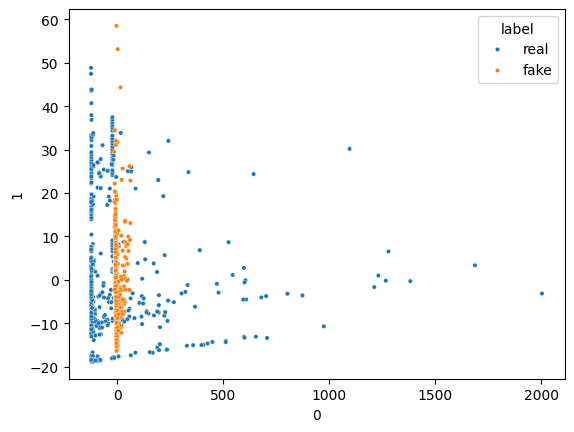

16/16 [==============================] - 0s 3ms/step


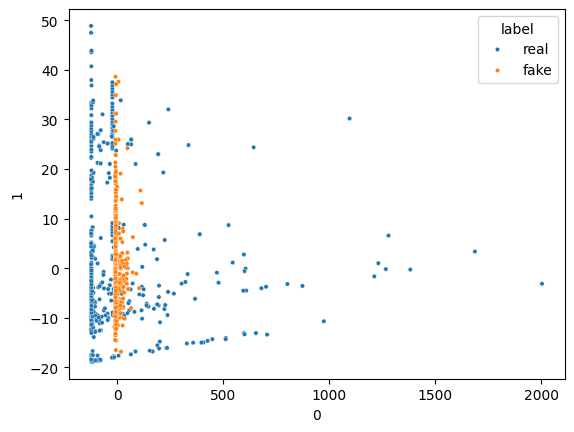

16/16 [==============================] - 0s 4ms/step


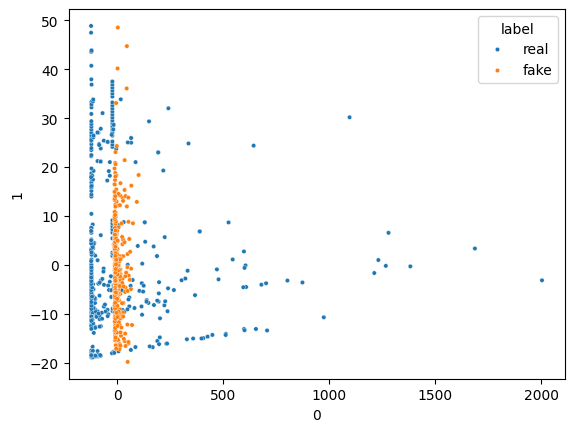

16/16 [==============================] - 0s 3ms/step


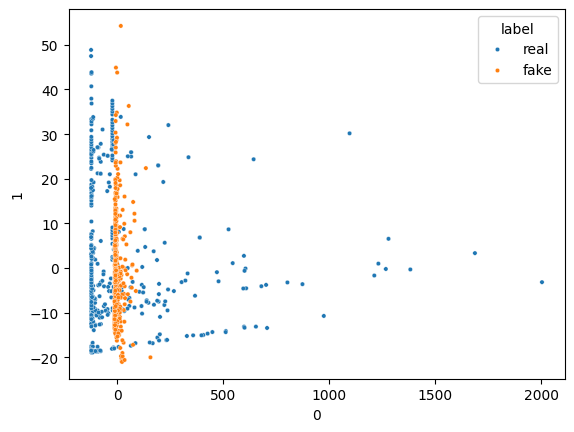

16/16 [==============================] - 0s 3ms/step


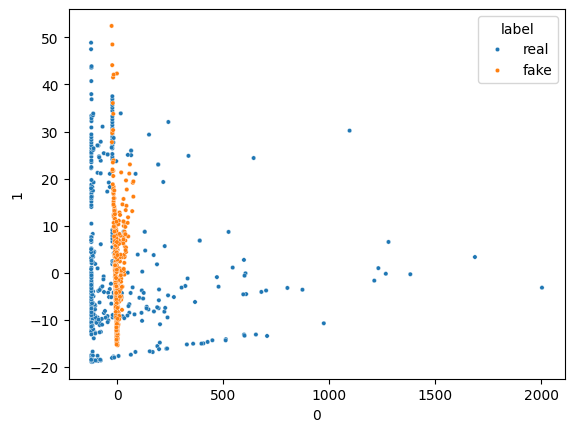

16/16 [==============================] - 0s 3ms/step


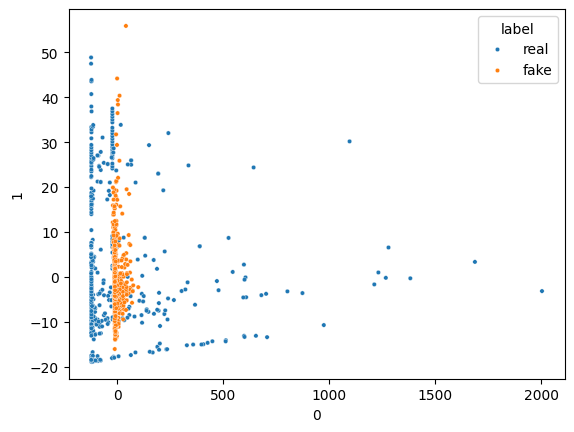

16/16 [==============================] - 0s 3ms/step


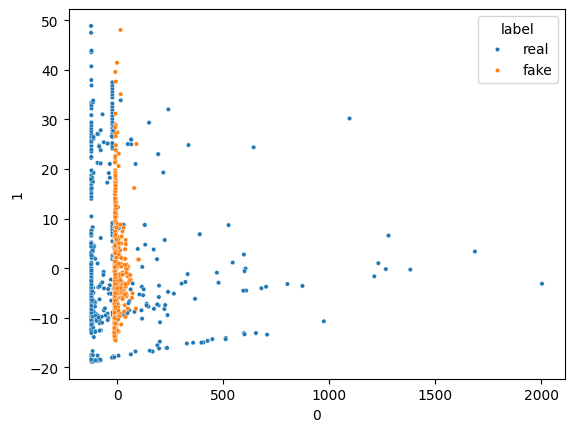

16/16 [==============================] - 0s 3ms/step


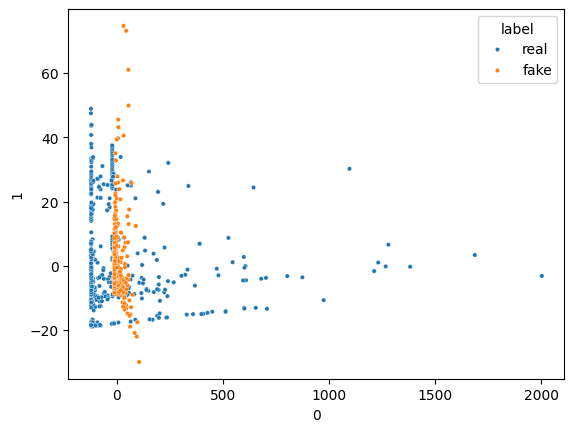

16/16 [==============================] - 0s 3ms/step


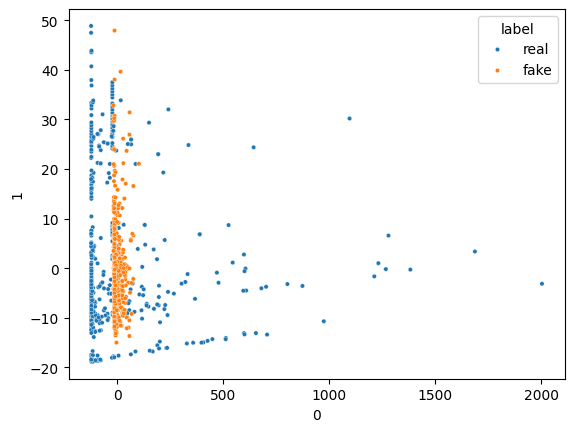

16/16 [==============================] - 0s 3ms/step


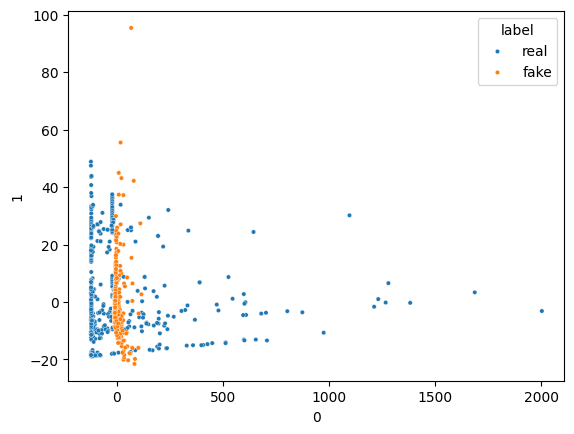

16/16 [==============================] - 0s 2ms/step


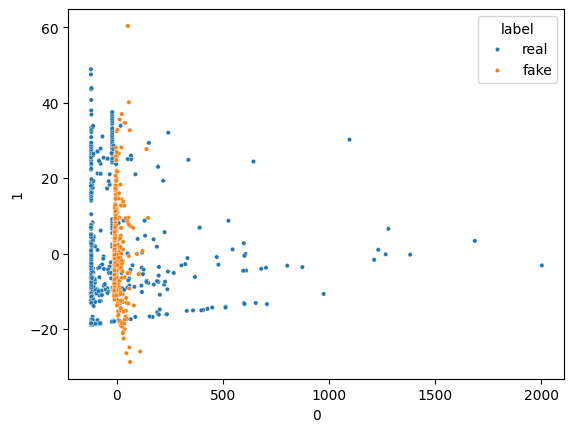

16/16 [==============================] - 0s 4ms/step


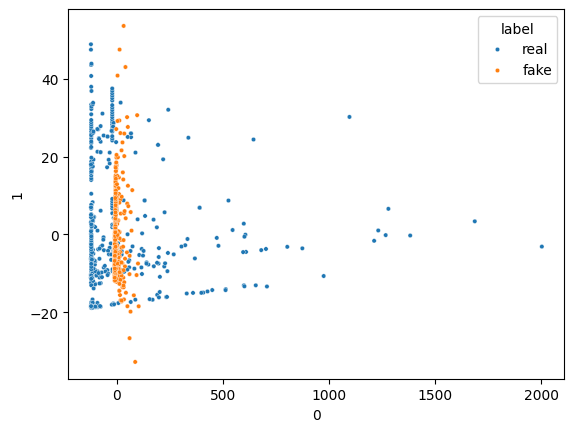

16/16 [==============================] - 0s 3ms/step


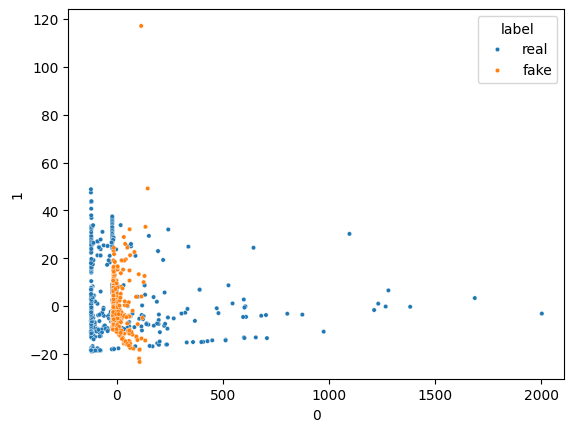

16/16 [==============================] - 0s 2ms/step


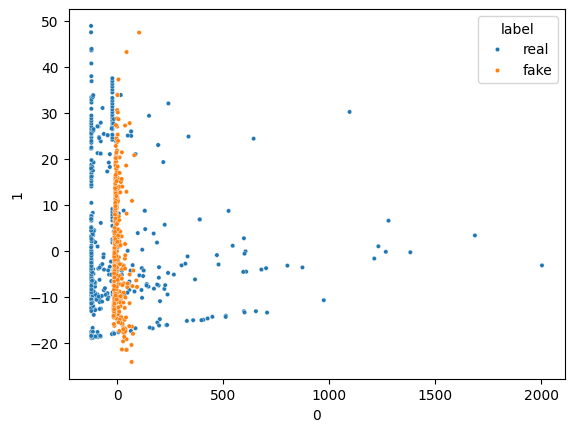

16/16 [==============================] - 0s 4ms/step


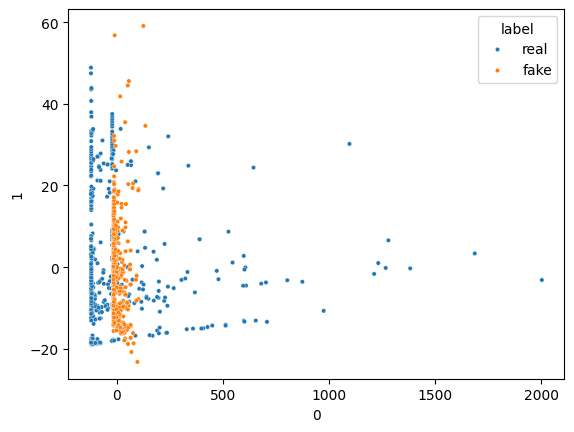

16/16 [==============================] - 0s 3ms/step


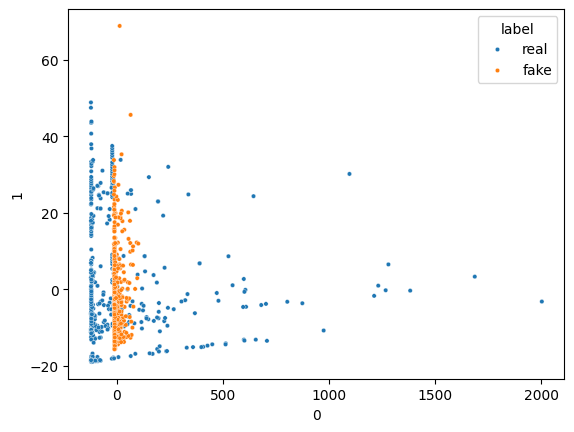

16/16 [==============================] - 0s 3ms/step


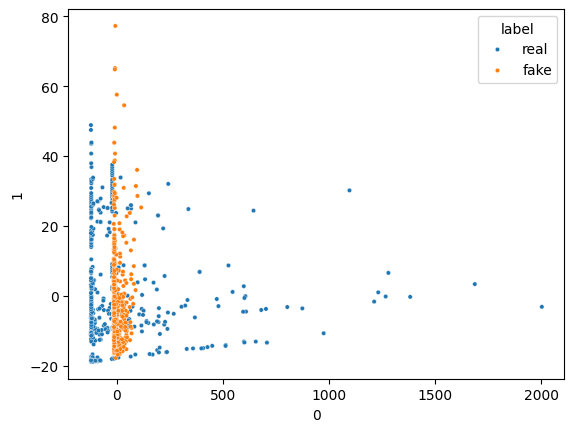

16/16 [==============================] - 0s 3ms/step


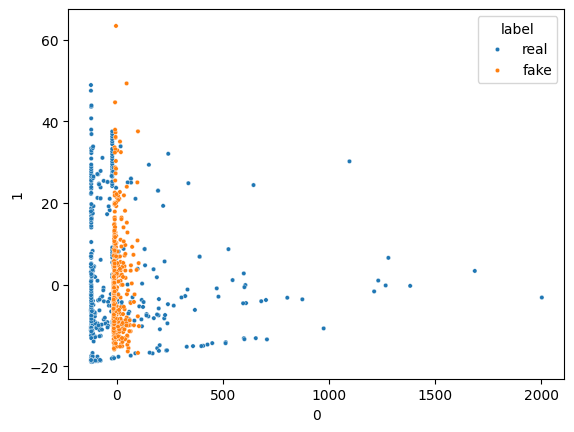

16/16 [==============================] - 0s 4ms/step


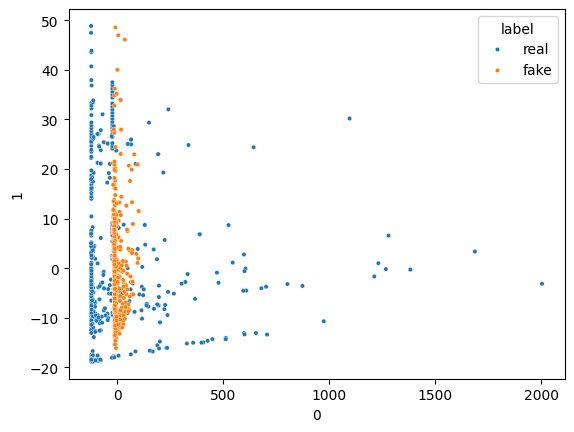

16/16 [==============================] - 0s 3ms/step


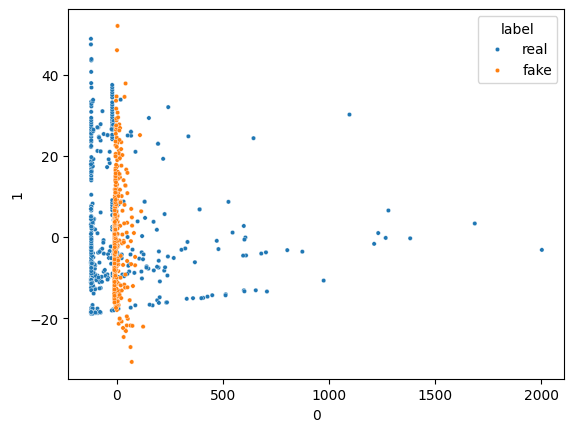

16/16 [==============================] - 0s 3ms/step


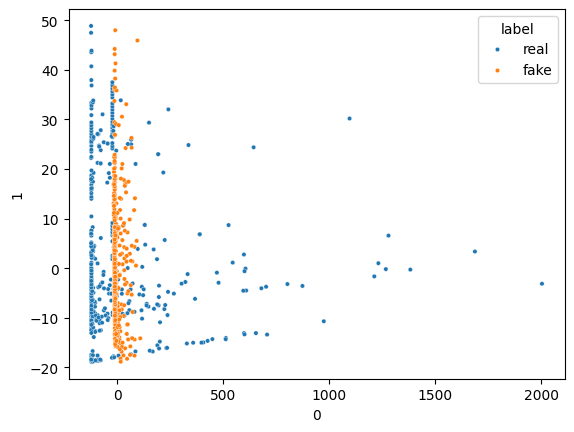

16/16 [==============================] - 0s 3ms/step


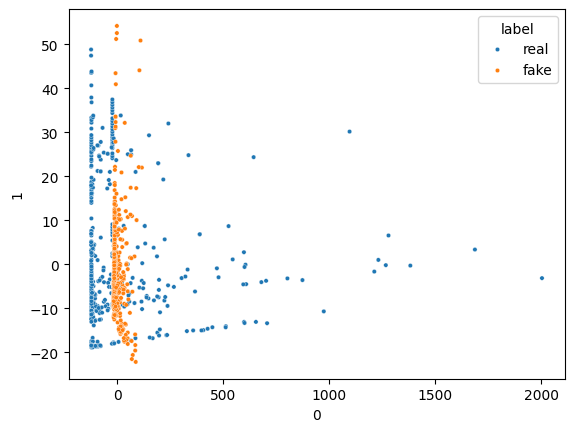

16/16 [==============================] - 0s 3ms/step


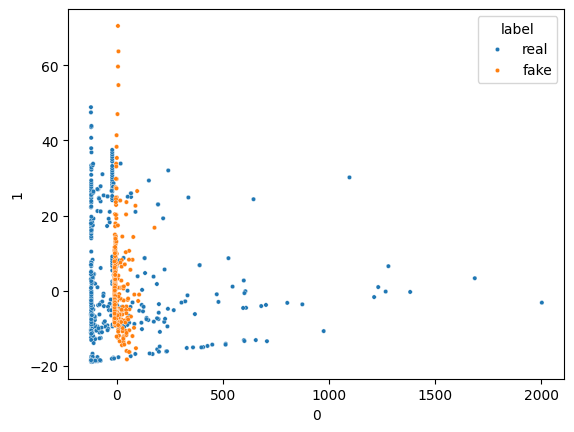

16/16 [==============================] - 0s 3ms/step


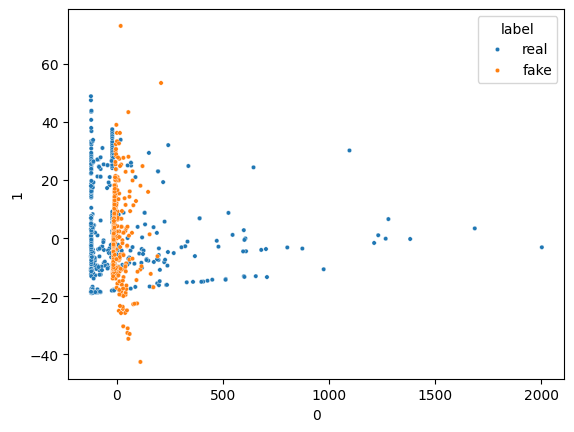

16/16 [==============================] - 0s 3ms/step


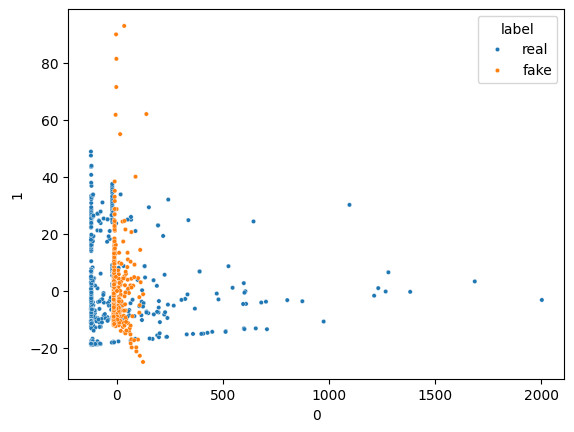

16/16 [==============================] - 0s 4ms/step


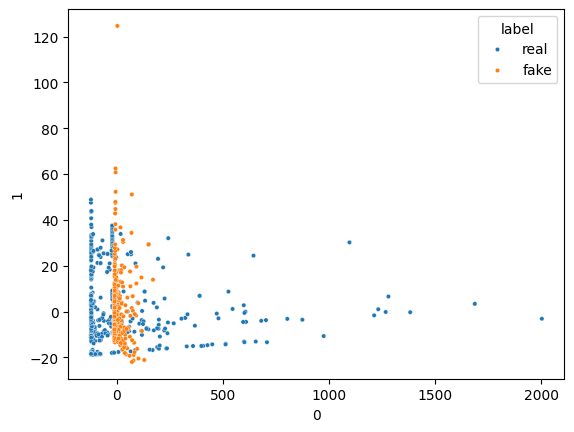

16/16 [==============================] - 0s 3ms/step


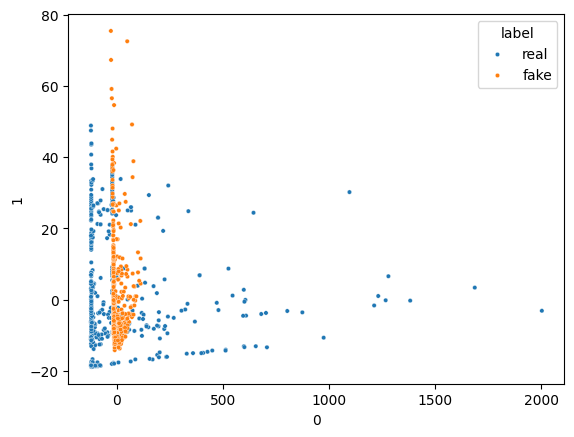

16/16 [==============================] - 0s 3ms/step


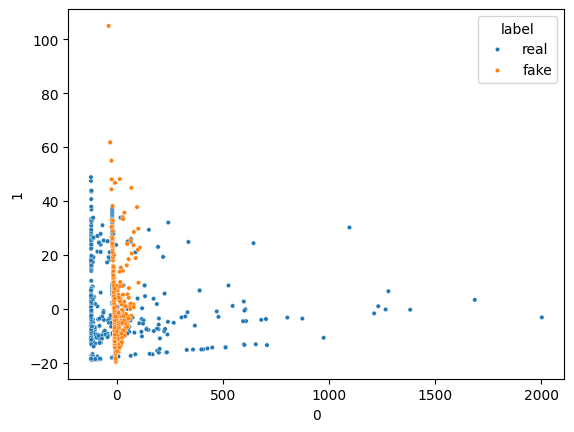

16/16 [==============================] - 0s 3ms/step


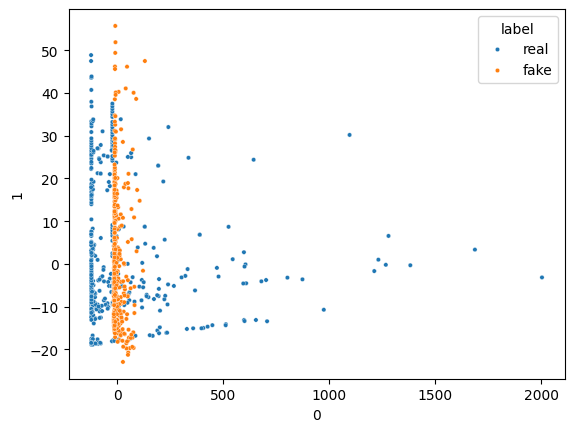

16/16 [==============================] - 0s 2ms/step


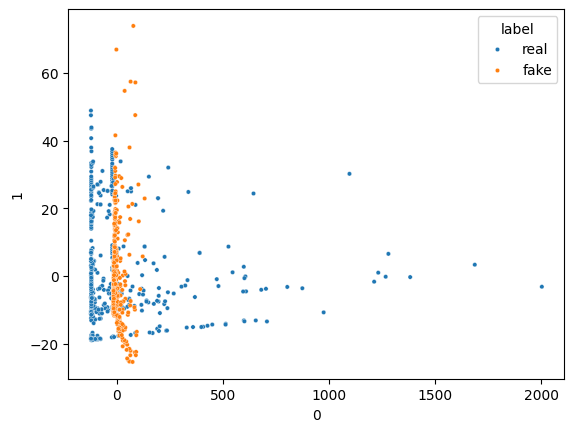

16/16 [==============================] - 0s 2ms/step


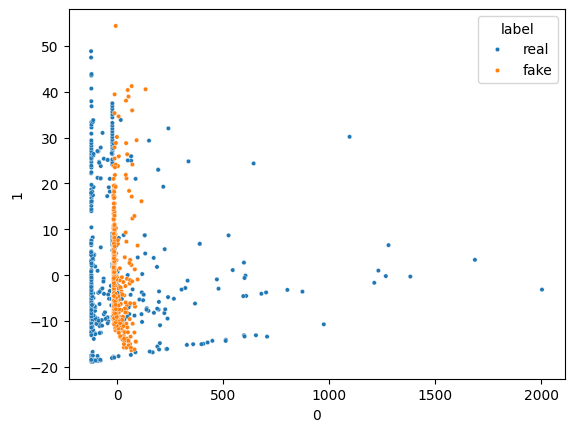

16/16 [==============================] - 0s 2ms/step


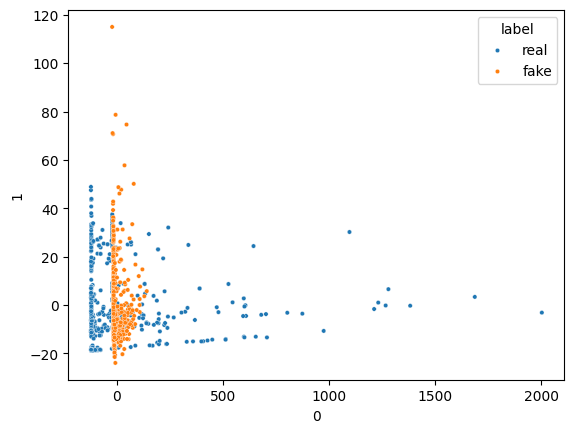

16/16 [==============================] - 0s 3ms/step


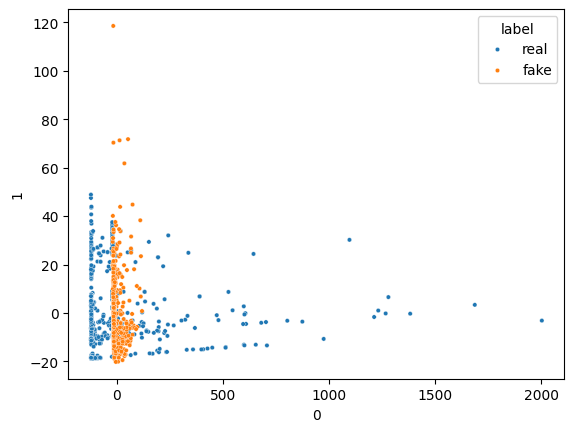

16/16 [==============================] - 0s 3ms/step


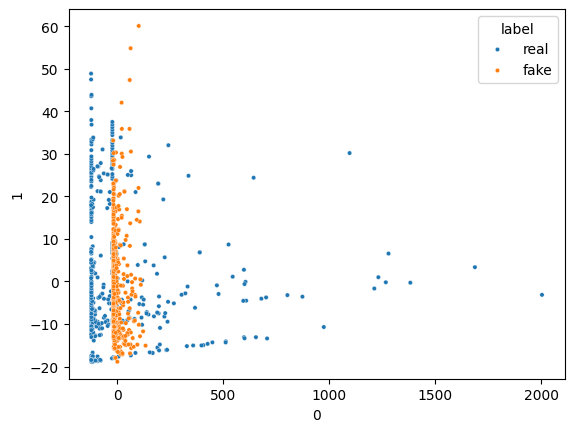

16/16 [==============================] - 0s 3ms/step


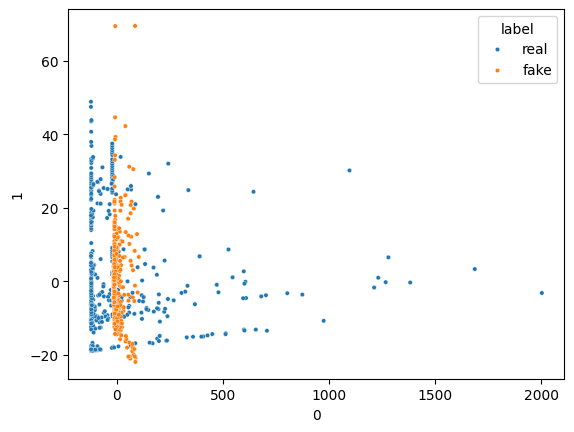

16/16 [==============================] - 0s 5ms/step


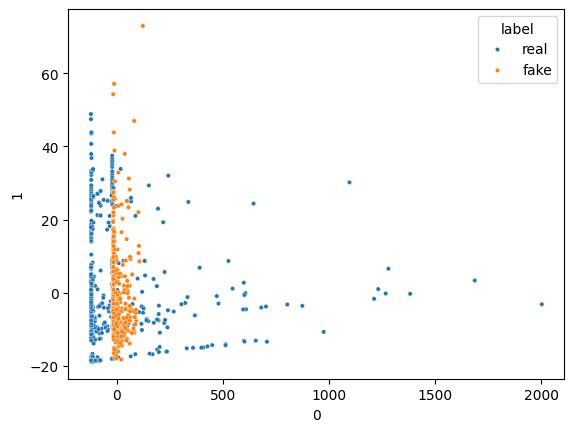

16/16 [==============================] - 0s 3ms/step


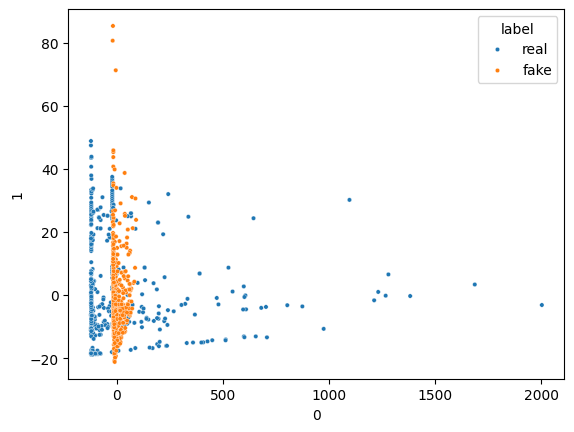

16/16 [==============================] - 0s 4ms/step


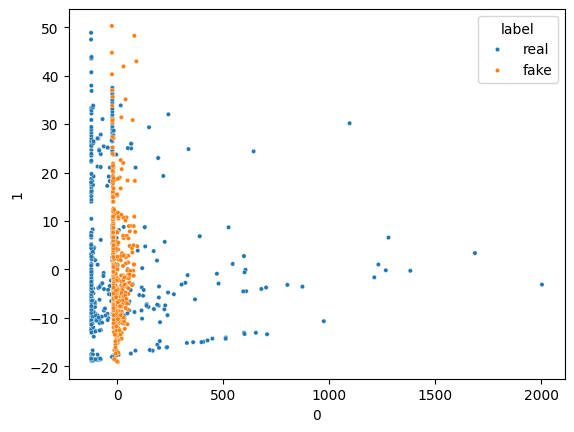

16/16 [==============================] - 0s 4ms/step


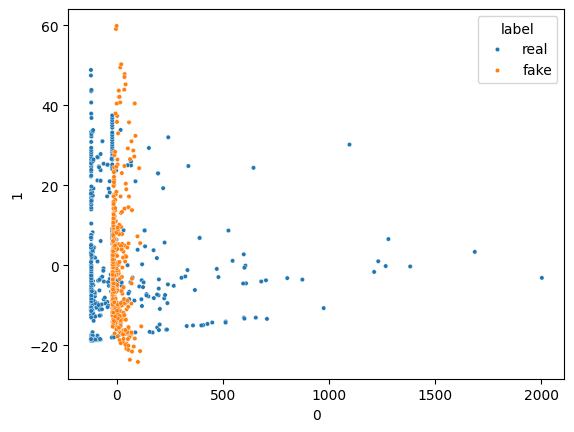

16/16 [==============================] - 0s 4ms/step


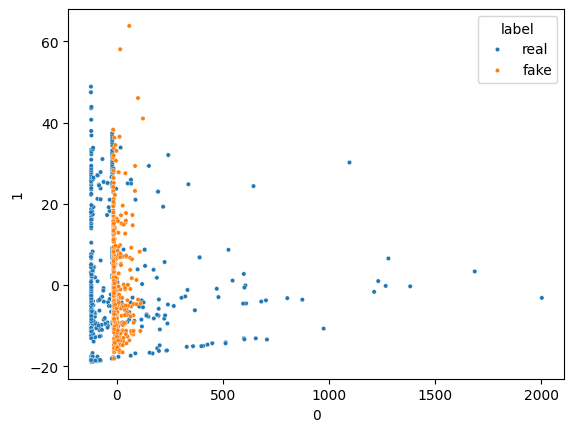

16/16 [==============================] - 0s 3ms/step


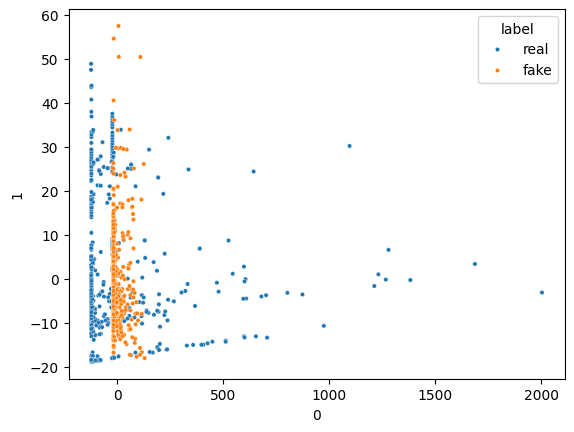

16/16 [==============================] - 0s 3ms/step


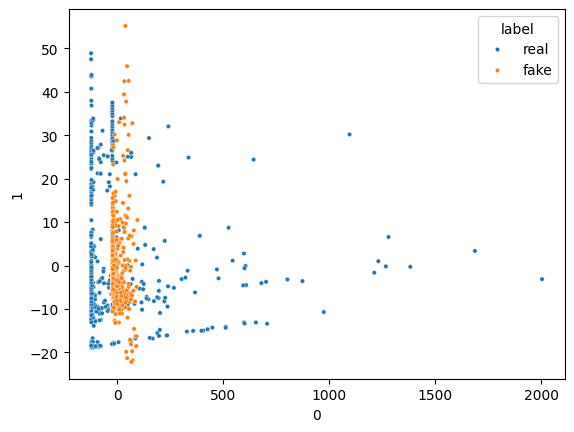

16/16 [==============================] - 0s 3ms/step


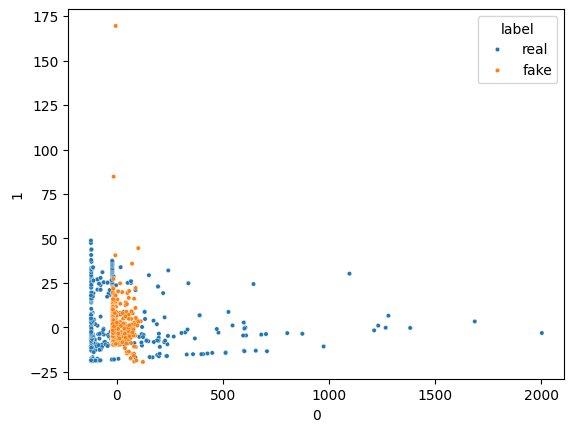

16/16 [==============================] - 0s 3ms/step


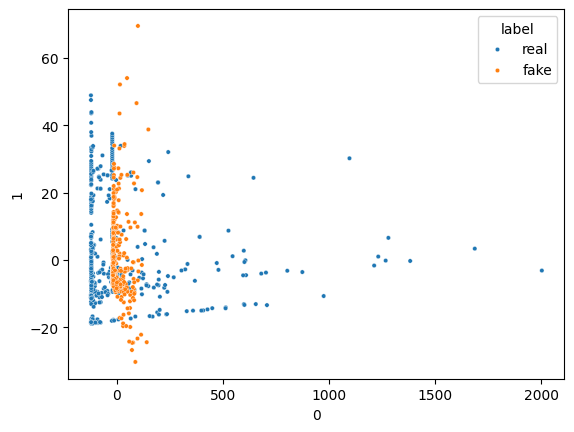

16/16 [==============================] - 0s 3ms/step


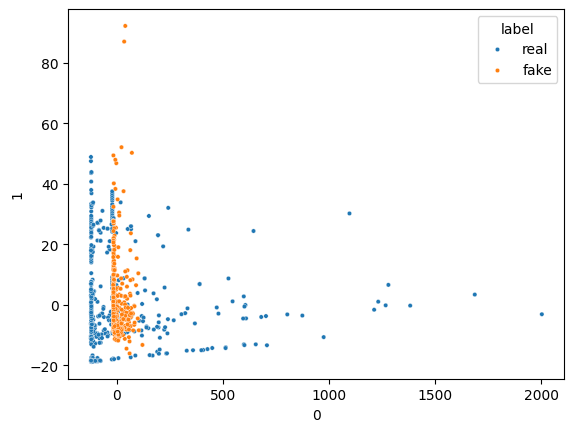

16/16 [==============================] - 0s 3ms/step


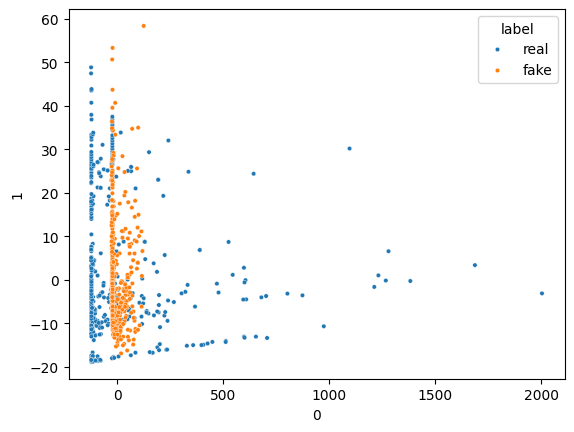

16/16 [==============================] - 0s 3ms/step


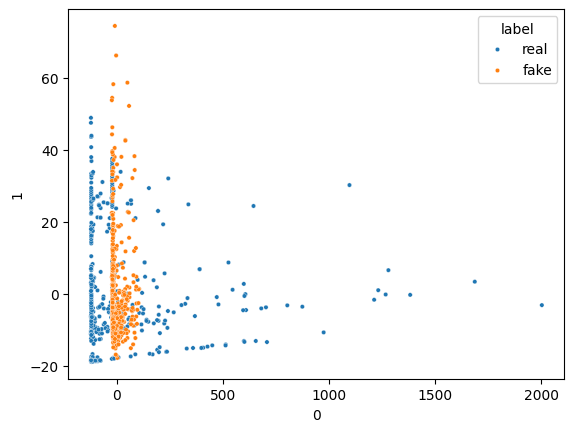

16/16 [==============================] - 0s 3ms/step


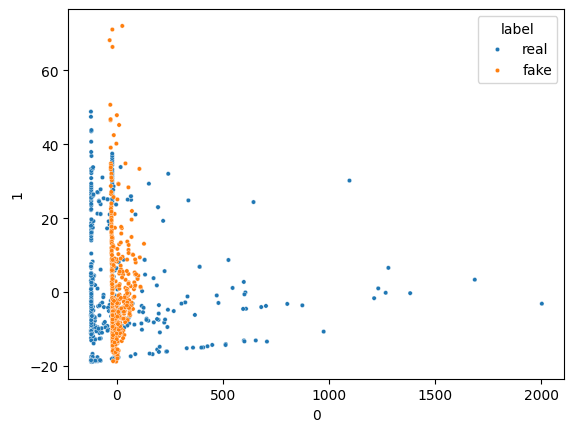

16/16 [==============================] - 0s 3ms/step


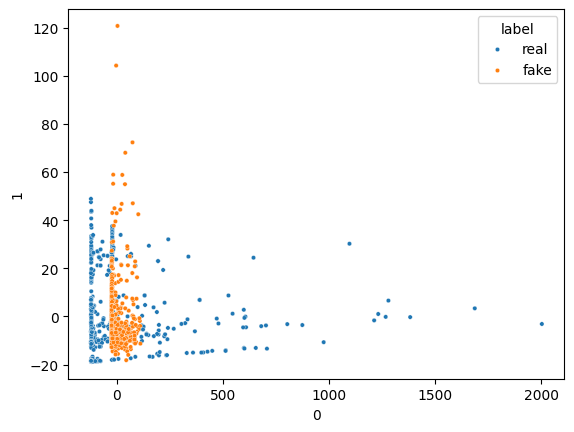

16/16 [==============================] - 0s 4ms/step


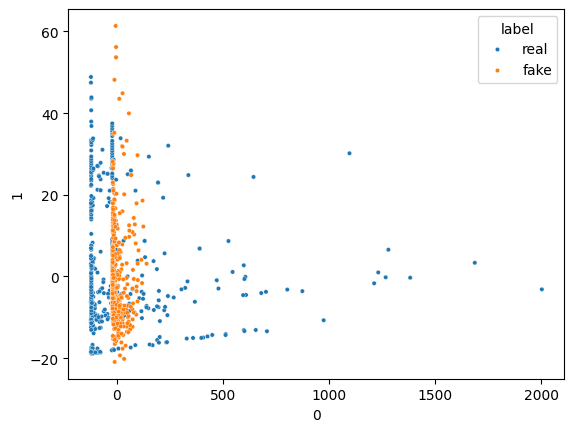

16/16 [==============================] - 0s 3ms/step


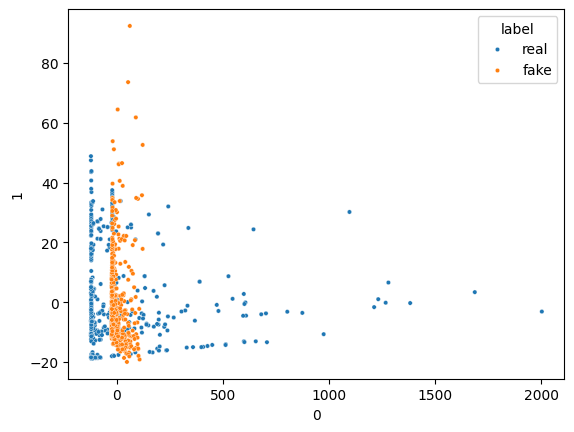

16/16 [==============================] - 0s 3ms/step


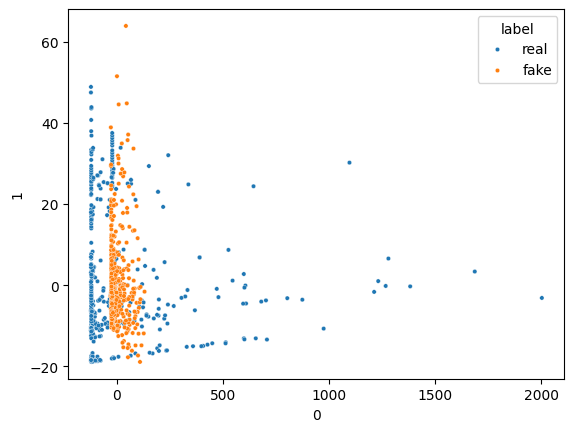

16/16 [==============================] - 0s 2ms/step


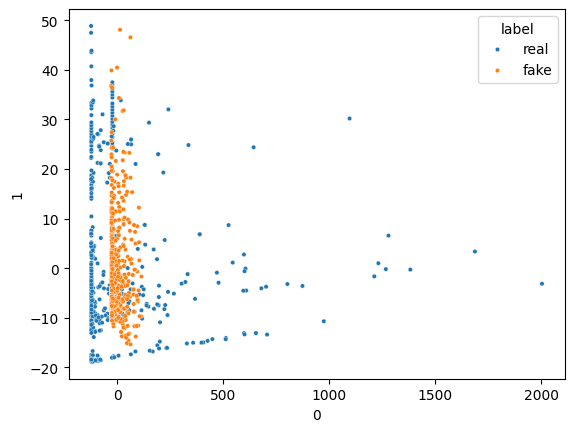

16/16 [==============================] - 0s 3ms/step


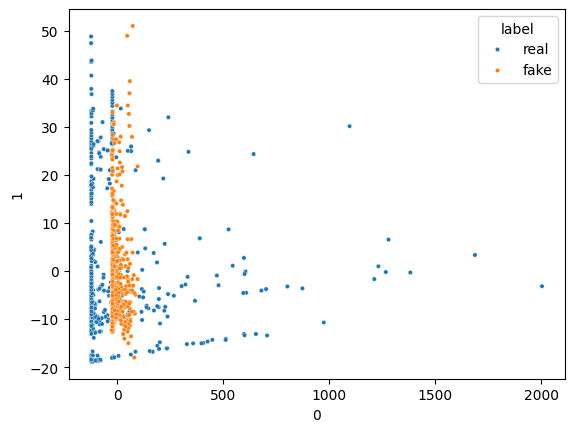

16/16 [==============================] - 0s 4ms/step


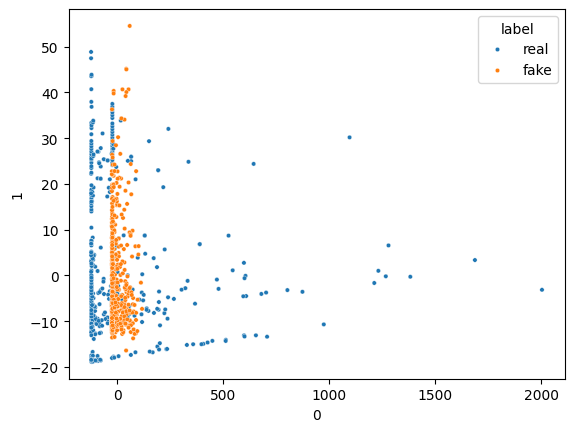

16/16 [==============================] - 0s 3ms/step


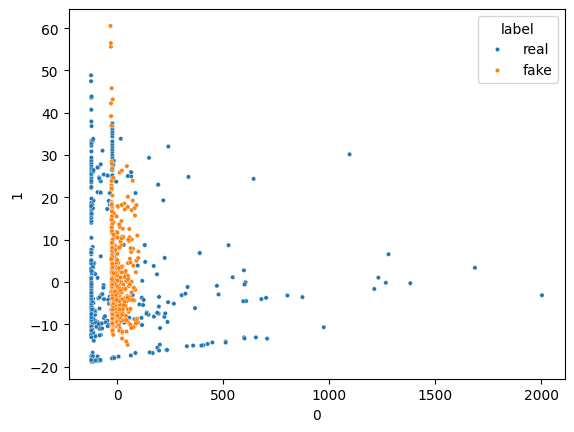

16/16 [==============================] - 0s 6ms/step


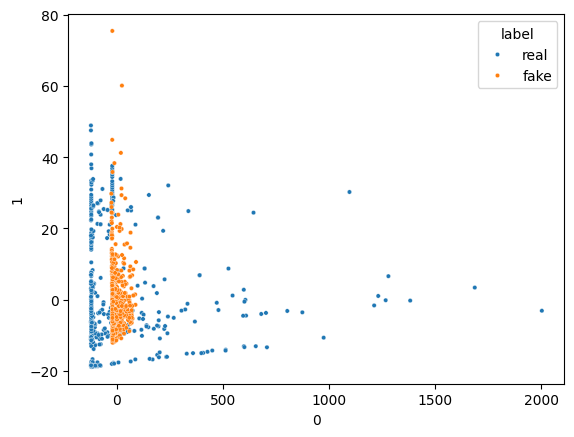

16/16 [==============================] - 0s 3ms/step


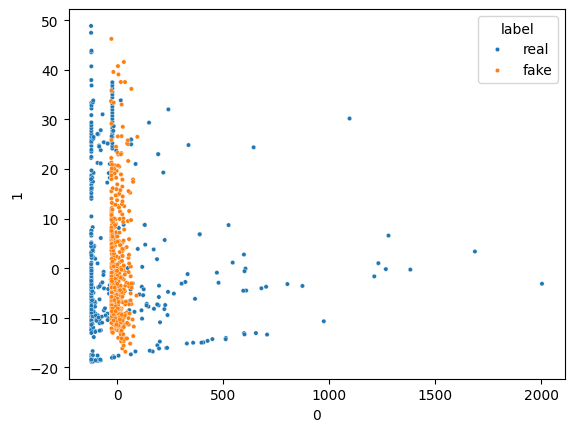

16/16 [==============================] - 0s 4ms/step


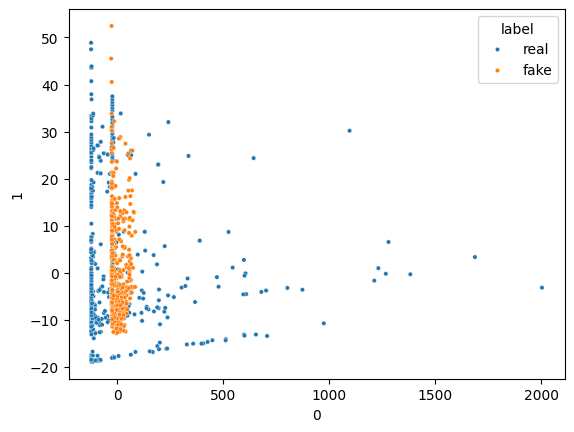

16/16 [==============================] - 0s 2ms/step


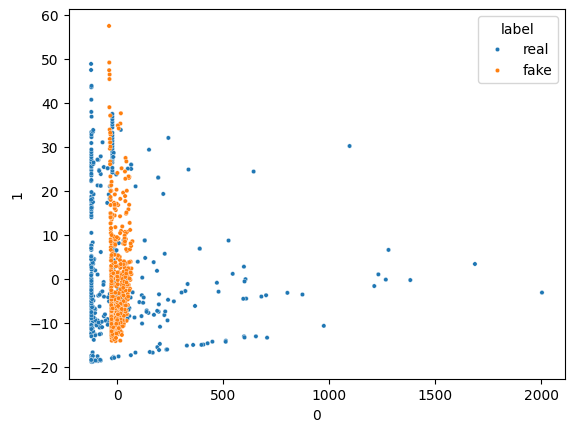

16/16 [==============================] - 0s 3ms/step


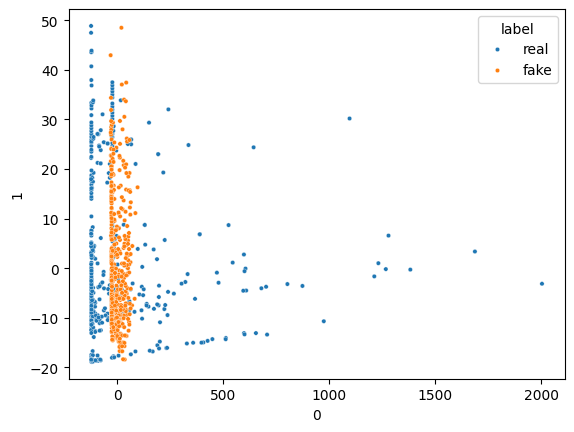

16/16 [==============================] - 0s 3ms/step


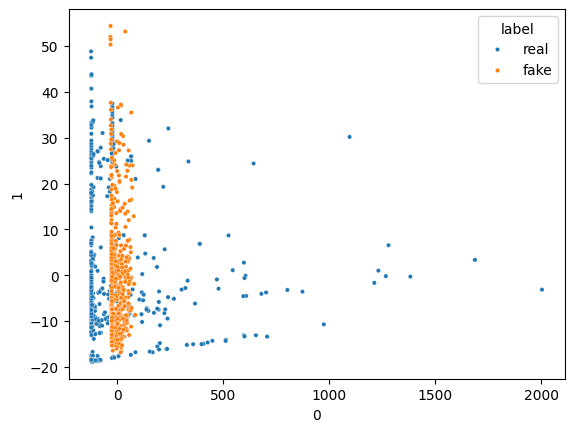

16/16 [==============================] - 0s 2ms/step


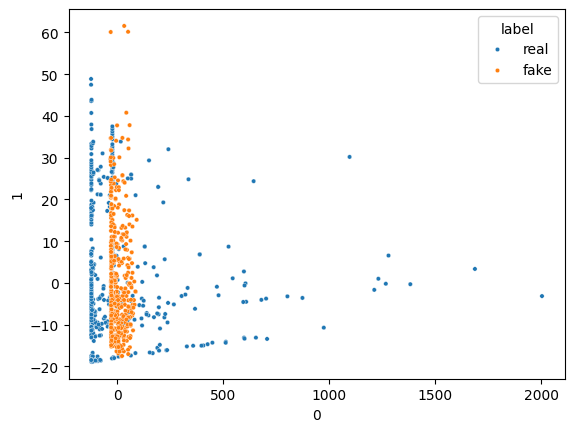

16/16 [==============================] - 0s 3ms/step


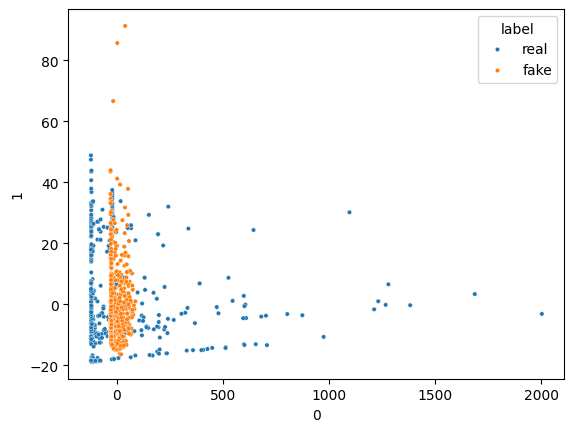

16/16 [==============================] - 0s 3ms/step


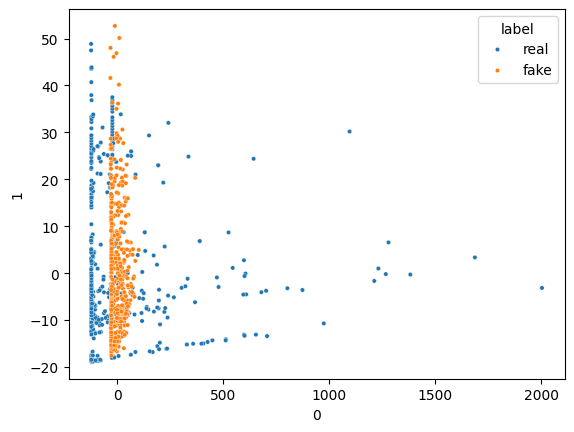

16/16 [==============================] - 0s 2ms/step


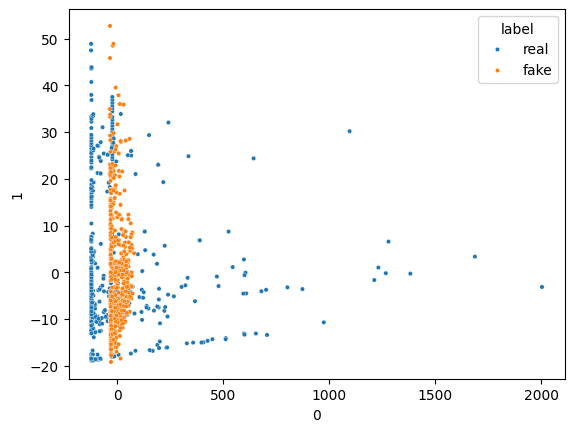

16/16 [==============================] - 0s 2ms/step


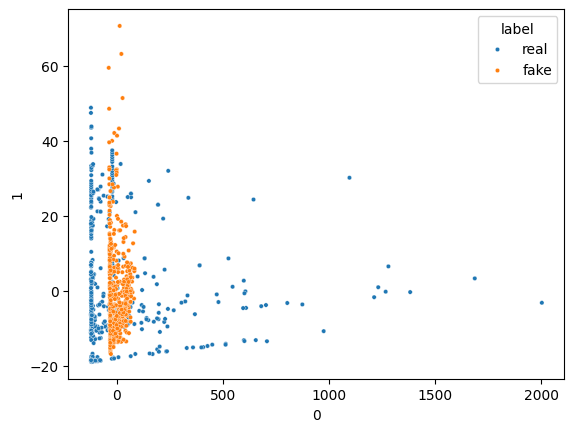

16/16 [==============================] - 0s 2ms/step


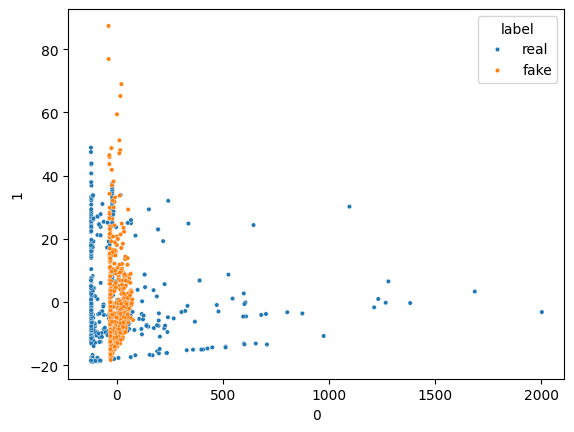

16/16 [==============================] - 0s 3ms/step


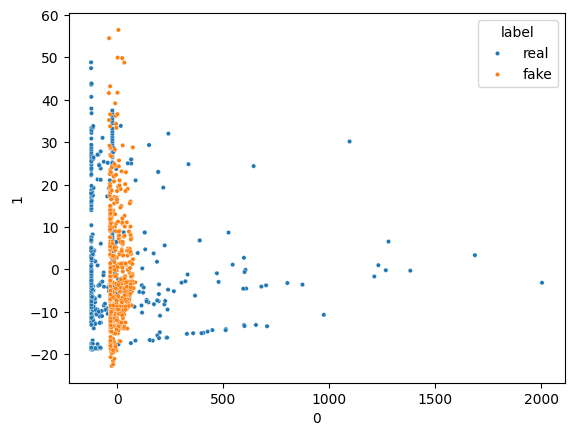

16/16 [==============================] - 0s 3ms/step


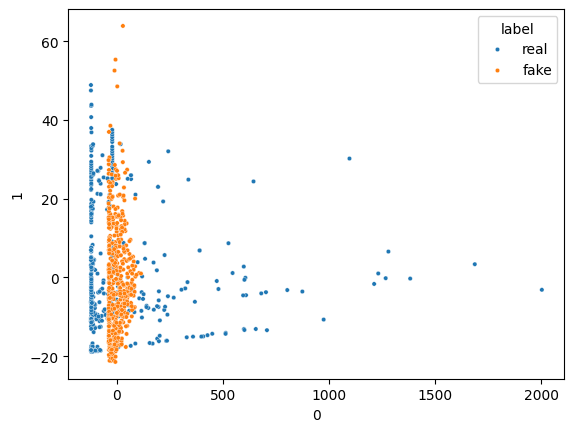

16/16 [==============================] - 0s 3ms/step


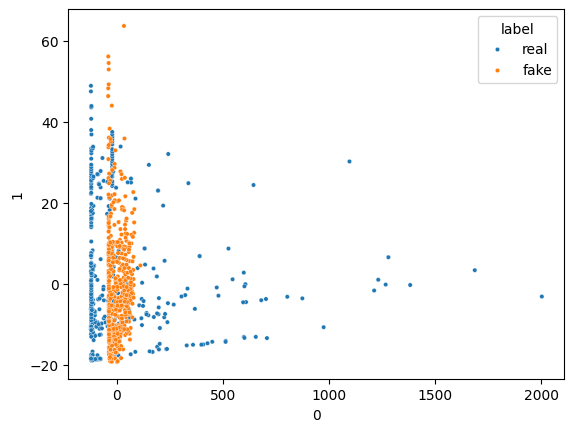

16/16 [==============================] - 0s 3ms/step


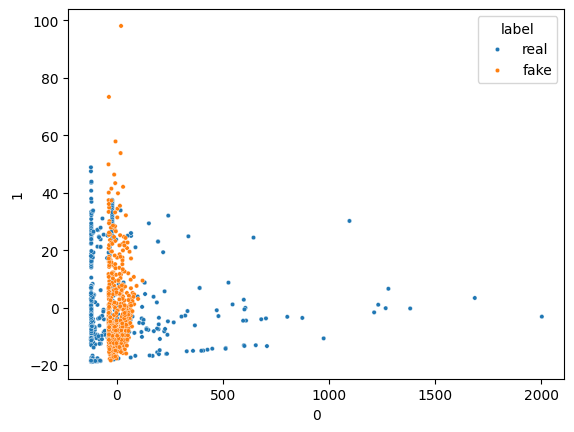

16/16 [==============================] - 0s 3ms/step


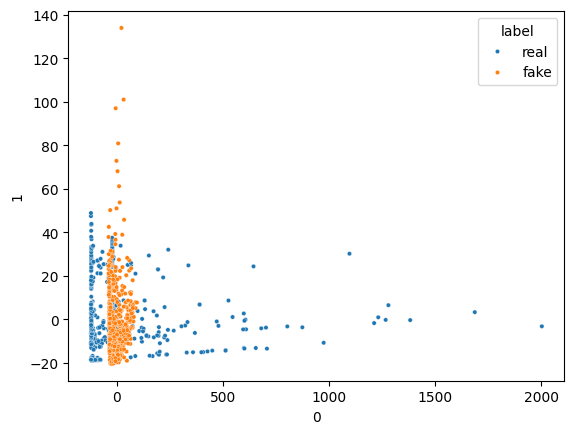

16/16 [==============================] - 0s 3ms/step


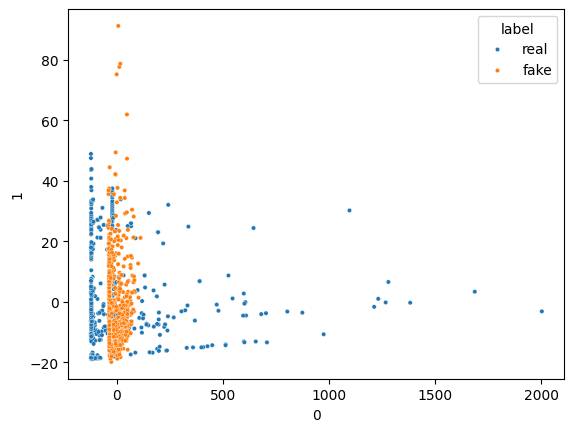

16/16 [==============================] - 0s 3ms/step


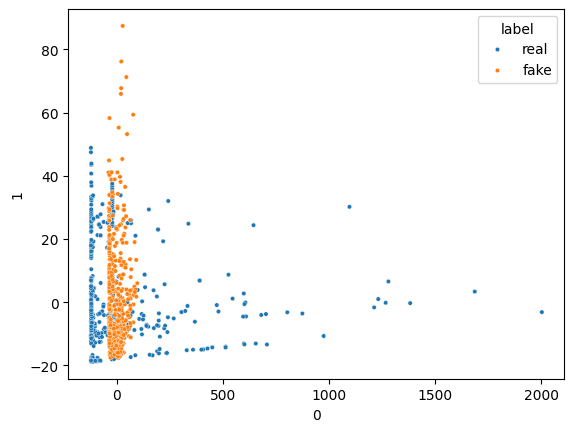

16/16 [==============================] - 0s 4ms/step


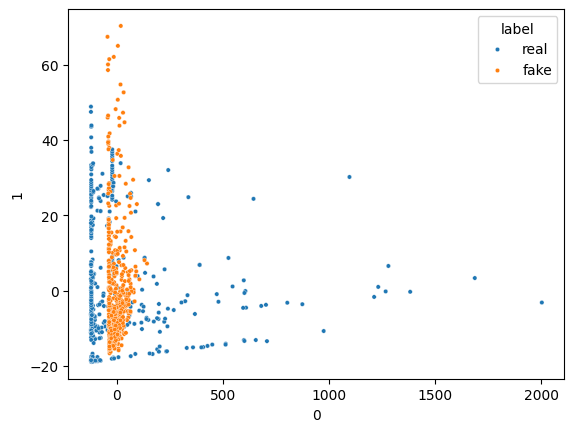

16/16 [==============================] - 0s 3ms/step


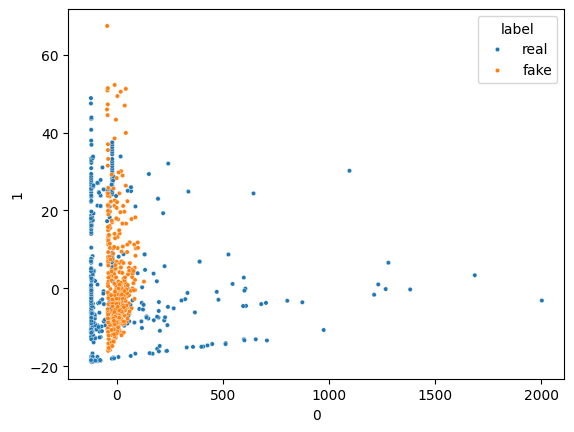

16/16 [==============================] - 0s 3ms/step


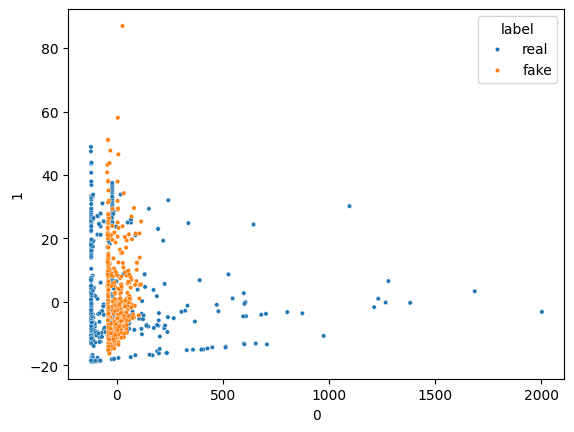

16/16 [==============================] - 0s 2ms/step


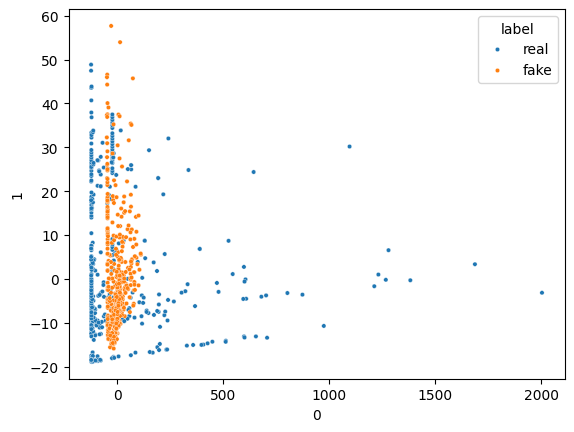

16/16 [==============================] - 0s 2ms/step


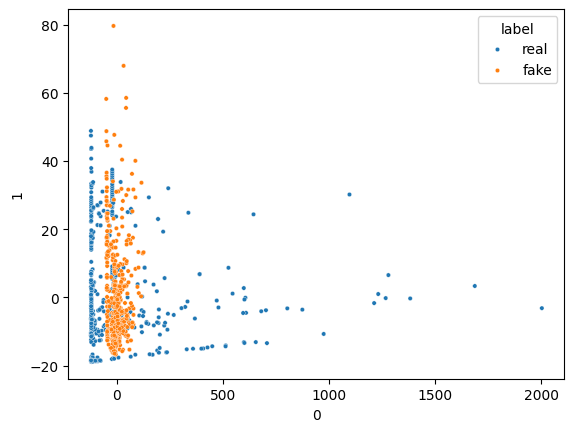

16/16 [==============================] - 0s 3ms/step


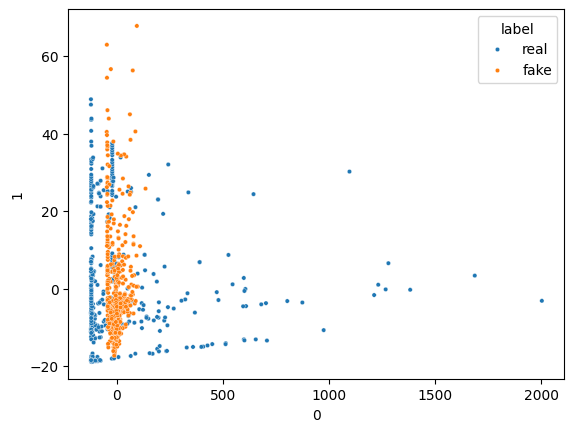

16/16 [==============================] - 0s 3ms/step


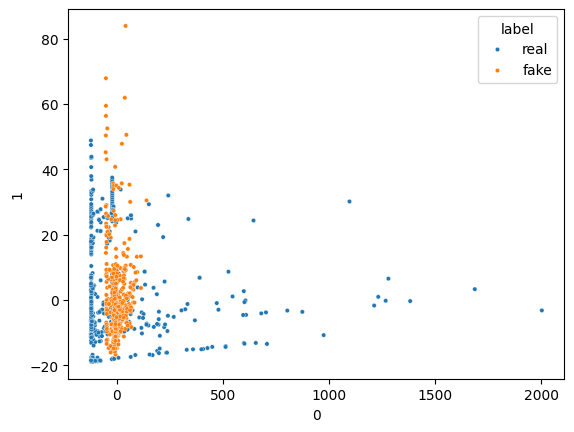

16/16 [==============================] - 0s 3ms/step


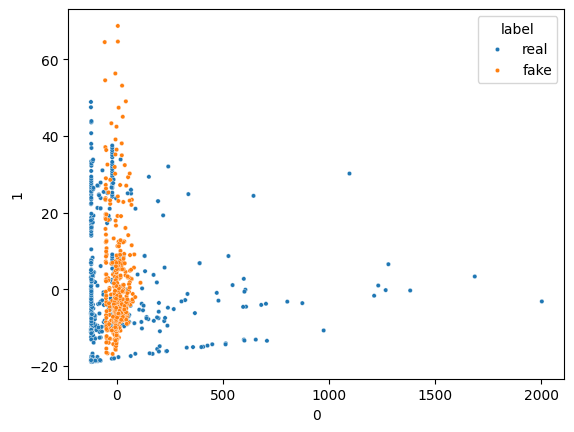

2/2 [==============================] - 0s 6ms/step


In [37]:
generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)
gan.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

num_epochs = 10000
batch_size = 128
half_batch = int(batch_size /2)

for epoch in range(num_epochs):

  X_fake = generate_synthetic_data(generator, half_batch)
  y_fake = np.zeros((half_batch, 1))

  X_real = data_fraud.drop('Class', axis = 1).sample(half_batch)
  y_real = np.ones((half_batch, 1))

  discriminator.trainable = True
  discriminator.train_on_batch(X_real, y_real)
  discriminator.train_on_batch(X_fake, y_fake)

  noise = np.random.normal(0,1, (batch_size , 29))
  gan.train_on_batch(noise, np.ones((batch_size, 1)))

  if epoch%100 == 0:
    monitor_generator(generator)


## Generate synthetic data using the trained Generator

*   Generate 1000 fradulent data points using the trained generator
*   Compare the distribution of `real` and `synthetic` fradulent data points.


In [38]:
synthetic_data = generate_synthetic_data(generator, 1000)
df = pd.DataFrame(synthetic_data)
df['label'] = 'fake'

df2 = data_fraud.drop('Class', axis = 1)
df2['label'] = 'real'
df2.columns = df.columns

combined_df = pd.concat([df, df2])
combined_df

32/32 [==============================] - 0s 2ms/step


0          1          2         3          4         5  \
0      -1.502833   3.589633  -5.752763  4.617044  -1.970167 -1.690608   
1     -16.120657  11.231142 -17.162584  8.195161 -11.728534 -0.087617   
2      -1.840413   2.429982  -3.282629  1.265934  -0.606145 -1.325833   
3      -3.016646   1.943716  -3.406576  1.014708  -2.037712 -0.792069   
4       1.105412   2.510046  -3.786977  5.300945  -0.476136 -0.478449   
...          ...        ...        ...       ...        ...       ...   
50487  -1.927883   1.125653  -4.518331  1.749293  -1.566487 -2.010494   
50488   1.378559   1.289381  -5.004247  1.411850   0.442581 -1.326536   
50489  -0.676143   1.126366  -2.213700  0.468308  -1.120541 -0.003346   
50490  -3.113832   0.585864  -5.399730  1.817092  -0.840618 -2.943548   
50491   1.991976   0.158476  -2.583441  0.408670   1.151147 -0.096695   

               6         7         8          9  ...        20        21  \
0      -3.619462  0.785977 -3.994153  -5.485141  ...  1.584636 -0.235701   
1     -22.452873 -8.524193 -6.871221 -15.289917  ... -5.916676  2.735961   
2      -1.655968  0.190385 -1.262537  -3.374989  ...  0.787492 -0.007683   
3      -2.123958 -0.401444 -0.258112  -2.721896  ...  1.377321 -0.193843   
4      -2.907681  0.538906 -2.950170  -3.979737  ...  0.957347 -0.215433   
...          ...       ...       ...        ...  ...       ...       ...   
50487  -0.882850  0.697211 -2.064945  -5.587794  ...  0.778584 -0.319189   
50488  -1.413170  0.248525 -1.127396  -3.232153  ...  0.370612  0.028234   
50489  -2.234739  1.210158 -0.652250  -3.463891  ...  0.751826  0.834108   
50490  -2.208002  1.058733 -1.632333  -5.245984  ...  0.583276 -0.269209   
50491   0.223050 -0.068384  0.577829  -0.888722  ... -0.164350 -0.295135   

             22        23        24        25        26        27          28  \
0     -0.238926  0.279582 -0.179373  0.315302  0.520496  0.102344   56.181549   
1      1.283269  0.368558 -1.439895 -0.699446 -2.749023 -0.610970    1.365277   
2     -0.499838  0.015339  0.167502 -0.294535 -0.309452  0.438709   49.249287   
3     -0.339300  0.190723  0.045318 -0.024456 -0.524360  0.625451   91.246048   
4     -0.156440 -0.532865  0.873237  0.528971  1.106025  0.332199   14.398540   
...         ...       ...       ...       ...       ...       ...         ...   
50487  0.639419 -0.294885  0.537503  0.788395  0.292680  0.147968  390.000000   
50488 -0.145640 -0.081049  0.521875  0.739467  0.389152  0.186637    0.760000   
50489  0.190944  0.032070 -0.739695  0.471111  0.385107  0.194361   77.890000   
50490 -0.456108 -0.183659 -0.328168  0.606116  0.884876 -0.253700  245.000000   
50491 -0.072173 -0.450261  0.313267 -0.289617  0.002988 -0.015309   42.530000   

       label  
0       fake  
1       fake  
2       fake  
3       fake  
4       fake  
...      ...  
50487   real  
50488   real  
50489   real  
50490   real  
50491   real  

[1492 rows x 30 columns]

Checking the individual feature distribution of `synthetic` and `real` fraud data.

In [69]:
for col in combined_df.columns:
  plt.figure()
  fig = px.histogram(combined_df, color = 'label', x=col,barmode="overlay", title = f'Feature {col}', width = 640, height = 500)
  fig.show()

<ipython-input-69-7712b9dc83b8>:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [40]:
# Generate synthetic data using the generator
synthetic_data = generate_synthetic_data(generator, 1000)

# Create labels for the synthetic data (0 for fake)
synthetic_labels = np.zeros((1000, 1))

# Use the discriminator to predict whether the synthetic data is real or fake
predictions = discriminator.predict(synthetic_data)

# Convert predictions to binary (0 or 1)
binary_predictions = (predictions > 0.5).astype(int)

# Calculate accuracy score
accuracy = np.mean(binary_predictions == synthetic_labels)

print("Accuracy Score for Generative AI:", accuracy)

32/32 [==============================] - 0s 4ms/step
Accuracy Score for Generative AI: 0.936
